In [22]:
import numpy as np
from numpy import random
import pandas as pd
from numpy.random import seed, randn
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (8, 5)
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor

full_data = pd.read_csv("./Melbourne_housing_FULL.csv")
my_stats = full_data.describe(percentiles=[0.02, 0.05, .25, .5, .75, .95, .98, 0.99])\
                                                     .transpose().reset_index(drop=False)
my_stats["coefficent_variation"] = my_stats["std"]/my_stats["mean"]*100
my_stats

,index,count,mean,std,min,2%,5%,25%,50%,75%,95%,98%,99%,max,coefficent_variation
0,Rooms,34857.0,3.031012e+00,0.969933,1.00000,1.000000,2.00000,2.00000,3.0000,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.600000e+01,32.000296
1,Price,27247.0,1.050173e+06,641467.130105,85000.00000,349000.000000,415000.00000,635000.00000,870000.0000,1.295000e+06,2.250000e+06,2.857240e+06,3.400540e+06,1.120000e+07,61.082024
2,Distance,34856.0,1.118493e+01,6.788892,0.00000,1.900000,2.70000,6.40000,10.3000,1.400000e+01,2.470000e+01,3.170000e+01,3.540000e+01,4.810000e+01,60.696784
3,Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3011.000000,3015.00000,3051.00000,3103.0000,3.156000e+03,3.204000e+03,3.429000e+03,3.754000e+03,3.978000e+03,3.498771
4,Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,1.000000,2.00000,2.00000,3.0000,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,3.000000e+01,31.792606
5,Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.000000,1.00000,1.00000,2.0000,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01,44.572429
6,Car,26129.0,1.728845e+00,1.010771,0.00000,0.000000,0.00000,1.00000,2.0000,2.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,2.600000e+01,58.465078
7,Landsize,23047.0,5.935990e+02,3398.841946,0.00000,0.000000,0.00000,224.00000,521.0000,6.700000e+02,1.001000e+03,1.625640e+03,2.942120e+03,4.330140e+05,572.582161
8,BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,36.000000,56.00000,102.00000,136.0000,1.880000e+02,3.100000e+02,3.931800e+02,4.731800e+02,4.451500e+04,250.390661
9,YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1890.000000,1900.00000,1940.00000,1970.0000,2.000000e+03,2.013000e+03,2.015000e+03,2.016000e+03,2.106000e+03,1.899373


In [23]:
df = full_data.drop("Lattitude",axis=1)
df = df.drop("Longtitude",axis=1)
df = df.drop("Address",axis=1)
df = df.drop("Date", axis=1)

In [24]:
price_null =df.loc[df.loc[:,"Price"].isnull()]
year_null =df.loc[df.loc[:,"YearBuilt"].isnull()]
car_null =df.loc[df.loc[:,"Car"].isnull()]
land_null = df.loc[df.loc[:, "Landsize"].isnull()]
building_null = df.loc[df.loc[:, "BuildingArea"].isnull()]
df = df.loc[~df.index.isin(price_null.index)]
df = df.loc[~df.index.isin(year_null.index)]
df = df.loc[~df.index.isin(car_null.index)]
df = df.loc[~df.index.isin(land_null.index)]
df = df.loc[~df.index.isin(building_null.index)]

In [25]:
df.shape

(8895, 17)

In [26]:
year_null.shape

(19306, 17)

In [27]:
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0
11,Abbotsford,3,h,1876000.0,S,Nelson,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,4019.0
14,Abbotsford,2,h,1636000.0,S,Nelson,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3,h,500000.0,PI,Ray,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,Northern Metropolitan,2940.0
34849,Wollert,3,h,570000.0,SP,RW,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,Northern Metropolitan,2940.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,Western Metropolitan,6543.0


In [28]:
enc = ce.target_encoder.TargetEncoder(cols=["CouncilArea","Suburb","Regionname","Type","Postcode","Method","SellerG"]).fit(df, df["Price"])
df_enc = enc.transform(df)
df_enc

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,1.122001e+06,2,1.230293e+06,1035000.0,1.085550e+06,1.092821e+06,2.5,1.122001e+06,2.0,1.0,0.0,156.0,79.0,1900.0,1.113844e+06,877293.582506,4019.0
4,1.122001e+06,3,1.230293e+06,1465000.0,9.183274e+05,1.092821e+06,2.5,1.122001e+06,3.0,2.0,0.0,134.0,150.0,1900.0,1.113844e+06,877293.582506,4019.0
6,1.122001e+06,4,1.230293e+06,1600000.0,1.287144e+06,1.047623e+06,2.5,1.122001e+06,3.0,1.0,2.0,120.0,142.0,2014.0,1.113844e+06,877293.582506,4019.0
11,1.122001e+06,3,1.230293e+06,1876000.0,1.085550e+06,1.047623e+06,2.5,1.122001e+06,4.0,2.0,0.0,245.0,210.0,1910.0,1.113844e+06,877293.582506,4019.0
14,1.122001e+06,2,1.230293e+06,1636000.0,1.085550e+06,1.047623e+06,2.5,1.122001e+06,2.0,1.0,2.0,256.0,107.0,1890.0,1.113844e+06,877293.582506,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,8.672871e+05,3,1.230293e+06,500000.0,1.190169e+06,8.627350e+05,25.5,8.672871e+05,3.0,2.0,2.0,383.0,118.0,2016.0,6.425154e+05,877293.582506,2940.0
34849,8.672871e+05,3,1.230293e+06,570000.0,9.183274e+05,9.111955e+05,25.5,8.672871e+05,3.0,2.0,2.0,404.0,158.0,2012.0,6.425154e+05,877293.582506,2940.0
34853,1.047585e+06,2,1.230293e+06,888000.0,9.183274e+05,8.359931e+05,6.3,1.047585e+06,2.0,2.0,1.0,98.0,104.0,2018.0,8.650966e+05,878319.929126,6543.0
34854,1.047585e+06,2,9.037341e+05,705000.0,1.085550e+06,9.113903e+05,6.3,1.047585e+06,2.0,1.0,2.0,220.0,120.0,2000.0,8.650966e+05,878319.929126,6543.0


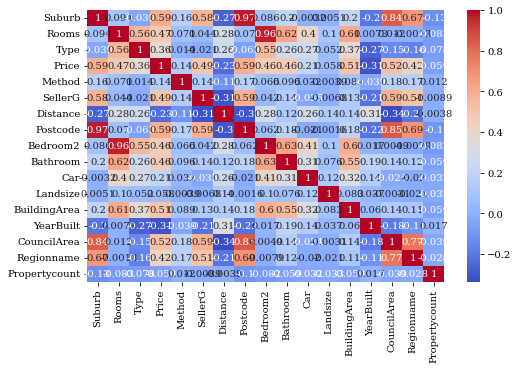

In [29]:
cor_matrix = df_enc.corr()
sns.heatmap(cor_matrix, annot=True, cmap = "coolwarm");

In [30]:
# splitting data into features and targets 
x = df_enc.drop(columns="Price")
y = df_enc.loc[:, "Price"]

# Removing 20% of data as holdout
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [31]:
# putting x & y back together for plotting
train_data = pd.concat([x_train, y_train], axis=1)
train_data

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Price
32315,5.580007e+05,3,1.230293e+06,1.190169e+06,8.518906e+05,20.6,5.630881e+05,3.0,2.0,2.0,653.0,121.0,1991.0,5.979509e+05,8.772936e+05,15510.0,562500.0
12421,1.059629e+06,2,1.230293e+06,1.085550e+06,1.047623e+06,4.5,1.059629e+06,2.0,1.0,0.0,137.0,67.0,1890.0,8.960527e+05,8.772936e+05,5533.0,1015000.0
9526,9.362200e+05,1,5.889090e+05,9.183274e+05,1.044196e+06,6.1,9.362200e+05,1.0,1.0,1.0,0.0,59.0,1995.0,1.252467e+06,1.493323e+06,13240.0,459000.0
8801,1.091469e+06,3,1.230293e+06,1.085550e+06,1.497333e+06,2.6,1.103813e+06,3.0,1.0,0.0,162.0,81.0,1915.0,1.113844e+06,8.772936e+05,14949.0,1100000.0
9333,1.164560e+06,1,5.889090e+05,1.085550e+06,9.579602e+05,3.3,1.164560e+06,1.0,1.0,0.0,0.0,42.0,1950.0,1.052488e+06,1.493323e+06,14887.0,367000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18414,1.184339e+06,3,1.230293e+06,1.085550e+06,1.414364e+06,13.4,1.216290e+06,3.0,1.0,2.0,448.0,96.0,1950.0,1.242791e+06,1.157120e+06,5713.0,1070000.0
16733,1.079668e+06,2,1.230293e+06,1.190169e+06,9.385042e+05,5.2,1.079668e+06,2.0,1.0,1.0,245.0,106.0,1890.0,8.960527e+05,8.772936e+05,11918.0,860000.0
17436,1.374323e+06,2,5.889090e+05,1.190169e+06,1.360909e+06,11.4,1.286509e+06,2.0,1.0,1.0,1.0,62.0,2011.0,1.160517e+06,1.493323e+06,6795.0,380000.0
2686,1.852178e+06,3,1.230293e+06,9.183274e+05,1.223067e+06,7.8,1.852178e+06,3.0,1.0,1.0,544.0,160.0,1930.0,1.827679e+06,1.493323e+06,8920.0,1622000.0


In [32]:
def compute_rmse(actual, prediction):
    rmse = np.sqrt(mean_squared_error(actual, prediction))
    # rounding to 2 decimal places
    print('RMSE is ', round(rmse,2))
    return rmse

In [33]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
linear_regression_predictions = linear_regression_model.predict(x_train)

linear_regression_rmse = compute_rmse(y_train, linear_regression_predictions)

RMSE is  383198.92


In [34]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)
random_forest_predictions = random_forest_model.predict(x_train)
random_forest_rmse = compute_rmse(y_train, random_forest_predictions)

RMSE is  109640.25


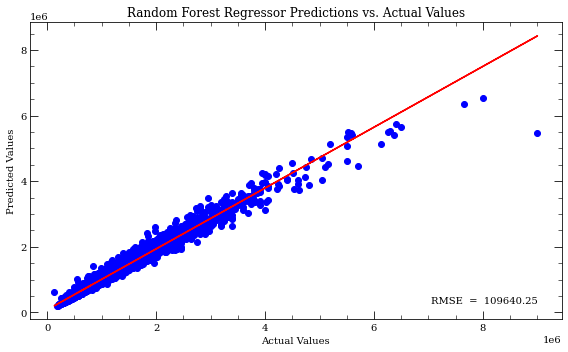

In [35]:
fig, ax = plt.subplots()
plt.rcParams["font.family"]= "serif"
plt.rcParams["pdf.fonttype"]= 42
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_train, random_forest_predictions, color = "blue")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor Predictions vs. Actual Values')
plt.text(max(y_train), min(random_forest_predictions),
         f"RMSE  =  {random_forest_rmse:.2f}", ha='right', va='bottom')

# Add a line of best fit to the plot
line_slope, line_intercept = np.polyfit(y_train, random_forest_predictions, 1)
plt.plot(y_train, line_slope*y_train + line_intercept, color='red')


# Show the plot
ax.minorticks_on()
ax.xaxis.set_ticks_position("both")
#ax1.xaxis.set_ticklabels_position("top")
ax.tick_params(top=True,right=True,which='major',direction='in',length=8, labelbottom=True, labeltop = False)
ax.tick_params(top=True,right=True,which='minor',direction='in',length=4)

fig.tight_layout()
# plt.show()

plt.savefig('random_forest.pdf')

plt.show();